<a href="https://colab.research.google.com/github/pravin-pk/Contactless-Payment-Server/blob/main/Final_year_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
model = tf.keras.models.Sequential([
#  tf.keras.layers.Flatten(input_shape=(28,28)),
 tf.keras.layers.Dense(784, activation='relu',input_shape=(784,)),
 tf.keras.layers.Dense(256, activation='relu'),
#  tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(128, activation='relu'),
 tf.keras.layers.Dense(32, activation='relu'),
 tf.keras.layers.Dense(8)
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
Total params: 853,688
Trainable params: 853,688
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, x_train, epochs=10)


Epoch 1/10


ValueError: ignored

------

In [65]:
!pip install tensorflow==2.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 108.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 106.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-ser

-----

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.11.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!rm -rf 'ROI'

In [2]:
from zipfile import ZipFile

with ZipFile('./drive/MyDrive/Final Year Project/Datasets/ROI.zip', 'r') as zipObj:
   # Extract a specific file from zip file
   zipObj.extractall('./')

In [3]:
# image_generator = ImageDataGenerator(rescale=1.0/255)

In [4]:
# palm_train = image_generator.flow_from_directory('./IITD_dataset/', class_mode='sparse')

In [5]:
# import numpy as np
# from PIL import Image
# import glob

# images = []
# for file in glob.glob('./Segmented/Right/*.JPG'):
#     image = Image.open(file).convert('L')
#     numpy_array = np.array(image)
#     images.append(numpy_array)
# for file in glob.glob('./Segmented/Left/*.JPG'):
#     image = Image.open(file).convert('L')
#     numpy_array = np.array(image)
#     images.append(numpy_array)

# palm_arrays = np.array(images)

In [6]:
import os
import shutil
import re

# Source and destination directories
dest_dir = './ROI/noDuplicates/'
os.makedirs(dest_dir)

# Regex pattern to match specific files
pattern = re.compile(r'\d{3}_1\.JPG')

# Loop through files in source directory
counter = 000
for file in os.listdir('./ROI/Right/'):
    # Check if file matches pattern
    if pattern.match(file):
        counter += 1
        # Move file to destination directory
        shutil.copy(os.path.join('./ROI/Right/', file), os.path.join(dest_dir,f'Right_{counter}.JPG'))

# Loop through files in source directory
counter = 000
for file in os.listdir('./ROI/Left/'):
    # Check if file matches pattern
    if pattern.match(file):
        counter += 1
        # Move file to destination directory
        shutil.copy(os.path.join('./ROI/Left/', file), os.path.join(dest_dir,f'Left_{counter}.JPG'))

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Initialize list to store images
images = []

for filename in os.listdir("./ROI/Left/"):
    # Read image
    img = cv2.imread(os.path.join("./ROI/Left/",filename), 0)
    
    # Append image to list
    images.append(img)
for filename in os.listdir("./ROI/Right/"):
    # Read image
    img = cv2.imread(os.path.join("./ROI/Right/",filename), 0)
    
    # Append image to list
    images.append(img)


# Loop through images in directory
# for filename in os.listdir("./ROI/noDuplicates/"):
#     # Read image
#     img = cv2.imread(os.path.join("./ROI/noDuplicates/",filename), 0)
    
#     # Append image to list
#     images.append(img)

palm_arrays = np.array(images)

In [2]:
palm_arrays.shape

(2601, 150, 150)

In [3]:
x_train = palm_arrays[:2000]
x_test = palm_arrays[2000:]
print(x_train.shape)
print(x_test.shape)

(2000, 150, 150)
(601, 150, 150)


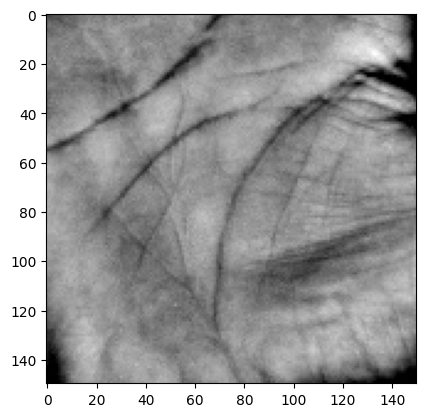

In [4]:
plt.imshow(x_train[2], cmap='gray')

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train = x_train.reshape(-1, 150, 150, 1)
x_test = x_test.reshape(-1, 150, 150, 1)
print(x_train.shape)
print(x_test.shape)

(2000, 150, 150, 1)
(601, 150, 150, 1)


In [6]:
import tensorflow as tf
from tensorflow import keras

input_img = keras.Input(shape=(150,150,1)) # shape = (width, height, channels)
encoded = keras.layers.Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
encoded = keras.layers.MaxPooling2D((2,2))(encoded)
encoded = keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
encoded = keras.layers.MaxPooling2D((3,3))(encoded)
# encoded = keras.layers.Conv2D(1, (3,3), activation='relu', padding='same')(encoded)
encoded = keras.layers.Flatten()(encoded)
encoded = keras.layers.Dropout(0.3)(encoded)
encoded = keras.layers.Dense(24*24, activation='relu')(encoded)
encoded = keras.layers.Dense(256, activation='relu')(encoded)
encoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.Dense(32, activation='relu')(encoded)

decoded_dense0 = keras.layers.Dense(32, activation='relu')(encoded)
decoded_dense1 = keras.layers.Dense(64, activation='relu')(decoded_dense0)
decoded_dense2 = keras.layers.Dense(256, activation='relu')(decoded_dense1)
decoded_dense3 = keras.layers.Dense(25*25, activation='relu')(decoded_dense2)
decoded_reshaped = keras.layers.Reshape((25,25,1))(decoded_dense3)
decoded_conv0 = keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(decoded_reshaped)
decoded_upSample0 = keras.layers.UpSampling2D((3,3))(decoded_conv0)
decoded_conv1 = keras.layers.Conv2D(16, (3,3), activation='relu', padding='same')(decoded_upSample0)
decoded_upSample1 = keras.layers.UpSampling2D((2,2))(decoded_conv1)
decoded = keras.layers.Conv2D(1, (3,3), activation='relu', padding='same')(decoded_upSample1)


autoencoder = keras.Model(input_img, decoded)

In [7]:
# Encoder Model
encoder = keras.Model(input_img, encoded)

In [8]:
# Decoder Model
# encoded_inputs = keras.Input(shape=(64,))
# decoded_layers = decoded[-8]

# decoder = keras.Model(encoded_inputs, decoded_layers)

In [9]:
encoder.layers

In [10]:
# encoder.compile(optimizer='adam', loss=tf.keras.losses.mae)

In [11]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.mae)

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20000)             0     

In [14]:
autoencoder.fit(x_train, x_train, epochs=9, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/9
63/63 [==============================] - 2s 29ms/step - loss: 0.1103 - val_loss: 0.1061
Epoch 2/9
63/63 [==============================] - 2s 27ms/step - loss: 0.1073 - val_loss: 0.1046
Epoch 3/9
63/63 [==============================] - 2s 29ms/step - loss: 0.1053 - val_loss: 0.1018
Epoch 4/9
63/63 [==============================] - 2s 27ms/step - loss: 0.1026 - val_loss: 0.0993
Epoch 5/9
63/63 [==============================] - 2s 26ms/step - loss: 0.1007 - val_loss: 0.0977
Epoch 6/9
63/63 [==============================] - 2s 25ms/step - loss: 0.0992 - val_loss: 0.0965
Epoch 7/9
63/63 [==============================] - 2s 25ms/step - loss: 0.0980 - val_loss: 0.0956
Epoch 8/9
63/63 [==============================] - 2s 25ms/step - loss: 0.0967 - val_loss: 0.0946
Epoch 9/9
63/63 [==============================] - 2s 25ms/step - loss: 0.0957 - val_loss: 0.0939


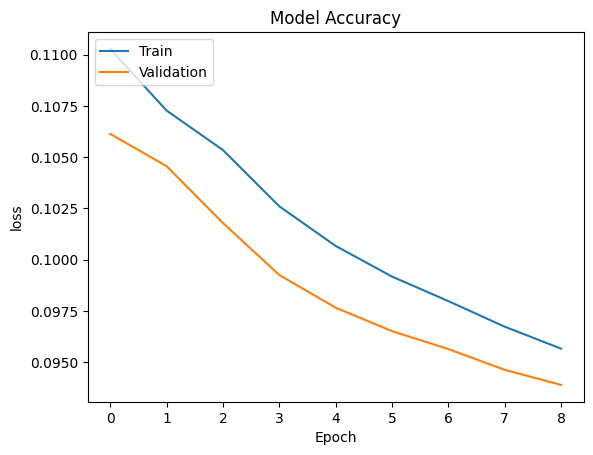

In [15]:
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
encoded_palms = encoder.predict(x_test)

19/19 [==============================] - 0s 4ms/step


In [17]:
encoded_palms.shape

(601, 32)

In [18]:
encoded_palms[49]

array([0.        , 0.84383315, 0.39664572, 0.        , 0.        ,
       0.        , 2.161777  , 4.0889587 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.9684744 , 0.        ,
       0.        , 1.8202307 , 0.        , 0.        , 0.96477795,
       0.        , 3.0253572 , 0.        , 0.        , 0.        ,
       0.2513291 , 0.36077482, 1.3768886 , 0.        , 1.8731    ,
       0.4652823 , 0.45818475], dtype=float32)

In [19]:
encoder.save('savedModel/encoder_conv_model')

In [20]:
import tarfile
import os

def make_tarfile(output_filename, source_dir):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))

make_tarfile("./drive/MyDrive/Final Year Project/Datasets/savedModel/model.tar.gz", "./savedModel/encoder_conv_model/")

In [21]:
# !zip -r ./savedModel/palm_encoder.zip ./savedModel/encoder_conv_model

In [22]:
# from google.colab import files
# files.download("./savedModel/model.tar.gz")

In [23]:
img = cv2.imread('./ROI/Right/003_3.JPG', 0)
palm = np.array(img.astype('float32')/255.0)

normal = encoder.predict(palm.reshape(-1, 150, 150, 1))

1/1 [==============================] - 0s 79ms/step


[[0.         0.38036796 0.42980534 0.         0.01331674 0.
  0.5282474  2.2530797  0.         0.         0.         0.
  0.         0.69528997 0.         0.         1.3266231  0.
  0.         0.7639297  0.2701294  3.0061502  0.         0.
  0.08034404 0.8642963  0.76108557 1.798213   0.         3.0135202
  1.1052117  1.486501  ]]


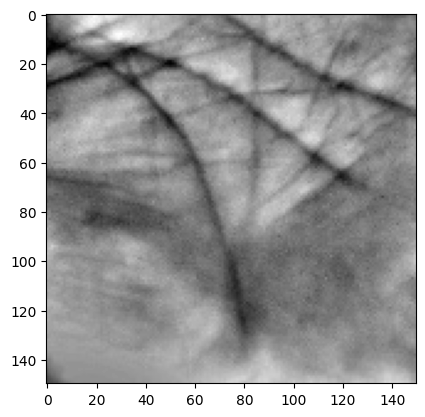

In [24]:
plt.imshow(palm, cmap='gray')
print(normal)

In [25]:
img = cv2.imread('./ROI/Right/008_3.JPG', 0)
palm = np.array(img.astype('float32')/255.0)

abnormal = encoder.predict(palm.reshape(-1, 150, 150, 1))

1/1 [==============================] - 0s 21ms/step


[[0.         0.38036796 0.42980534 0.         0.01331674 0.
  0.5282474  2.2530797  0.         0.         0.         0.
  0.         0.69528997 0.         0.         1.3266231  0.
  0.         0.7639297  0.2701294  3.0061502  0.         0.
  0.08034404 0.8642963  0.76108557 1.798213   0.         3.0135202
  1.1052117  1.486501  ]]


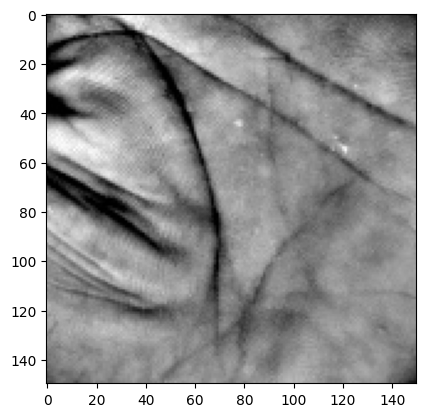

In [26]:
plt.imshow(palm, cmap='gray')
print(normal)

In [27]:
np.mean(np.abs(normal - abnormal))

0.105073094

1/1 [==============================] - 0s 20ms/step


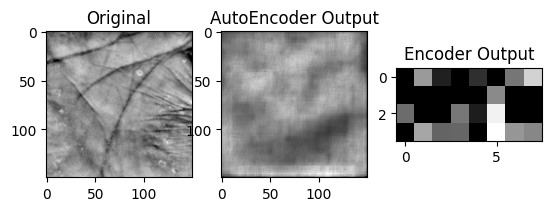

In [28]:
fig, ax = plt.subplots(1,3)
img = cv2.imread('./ROI/Left/005_2.JPG', 0)
palm = np.array(img.astype('float32')/255.0)
ax[0].imshow(palm, cmap='gray')
ax[0].set_title("Original")

auto = autoencoder.predict(palm.reshape(-1, 150, 150, 1))
# auto = decoder.predict(encoder.predict(palm.reshape(-1,150,150,1)))
auto = auto.reshape(150,150)
ax[1].imshow(auto, cmap='gray')
ax[1].set_title("AutoEncoder Output")

encoded_img = encoder.predict(palm.reshape(-1, 150, 150, 1))
encoded_img = encoded_img.reshape(4,8)
ax[2].imshow(encoded_img, cmap='gray')
ax[2].set_title("Encoder Output")

plt.show()

In [ ]:
plt.imshow(auto, cmap='gray')

In [ ]:
# img = x_test[80].reshape(-1, 150, 150, 1)
encoder.predict(img)

ValueError: ignored

---

In [ ]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 44.2 MB/s eta 0:00:00


In [ ]:
import boto3
import json
import numpy as np
import pandas as pd

runtime = boto3.Session(region_name='ap-south-1').client('sagemaker-runtime')

def get_prediction(data):
    data = data.tolist()
    response = runtime.invoke_endpoint(EndpointName="tensorflow-inference-2023-04-07-16-16-55-986",
                                       ContentType='application/json',
                                       Body=json.dumps(data))
    result = json.loads(response['Body'].read().decode())
    return result


In [ ]:
type(encoded_palms[1])

In [ ]:
data = encoded_palms[1]
print(get_prediction(data))